In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import seaborn as sns
%matplotlib inline

In [115]:
train=pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')

# EDA

In [116]:
train.shape, test.shape

((36992, 25), (19919, 24))

In [117]:
#printing first 5 rows
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [118]:
#checking type and null values in each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [119]:
#getting object type columns
train.dtypes==object

customer_id                      True
Name                             True
age                             False
gender                           True
security_no                      True
region_category                  True
membership_category              True
joining_date                     True
joined_through_referral          True
referral_id                      True
preferred_offer_types            True
medium_of_operation              True
internet_option                  True
last_visit_time                  True
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days         True
points_in_wallet                False
used_special_discount            True
offer_application_preference     True
past_complaint                   True
complaint_status                 True
feedback                         True
churn_risk_score                False
dtype: bool

We have 6 number type columns and 19 object type

In [120]:
train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

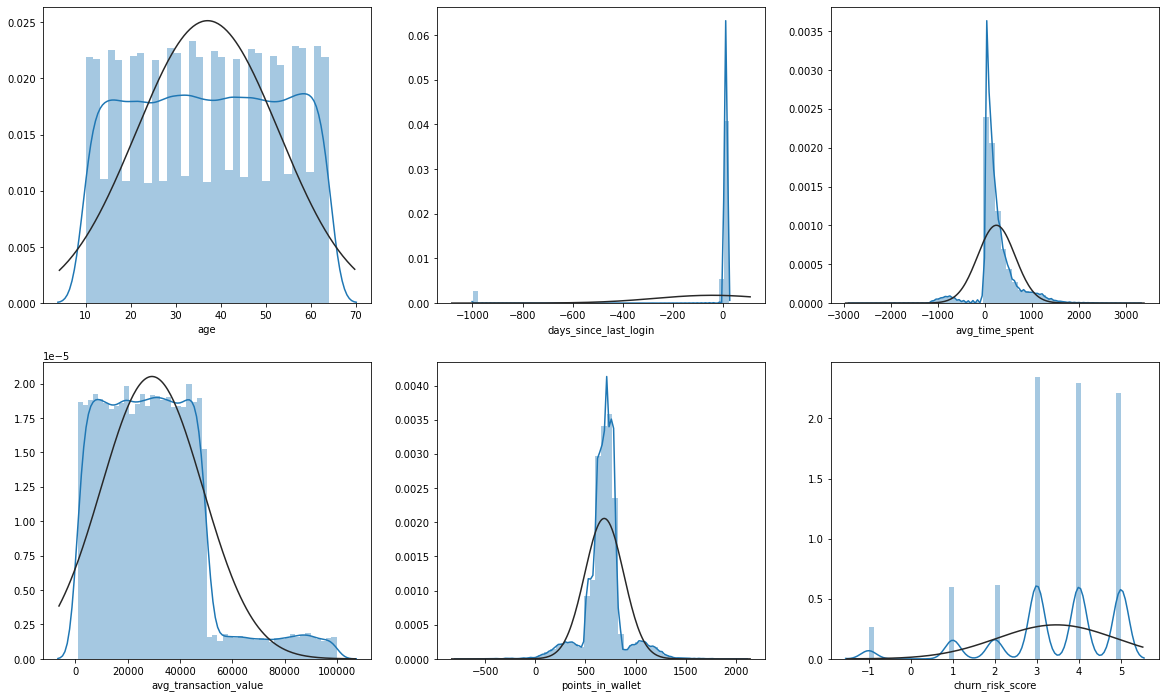

In [121]:
#visualization of distribution of values and normalized values
fig, ax=plt.subplots(2,3, figsize=(20,12))
r=0
c=0
for i in train.columns:
    if train[i].dtype==float or train[i].dtype==np.int64:
        
        sns.distplot(train[i], kde=True, hist=True, fit=norm, ax=ax[r, c])
        c+=1
        if c==3:
            r=1
            c=0

In [122]:
# #visualization of distribution of values and normalized values
# fig, ax=plt.subplots(2,3, figsize=(20,12))
# r=0
# c=0
# for i in train.columns:
#     if train[i].dtype==float or train[i].dtype==np.int64:
        
#         sns.distplot(np.log1p(train[i]), kde=True, hist=True, fit=norm, ax=ax[r, c])
#         c+=1
#         if c==3:
#             r=1
#             c=0

In [123]:
# #visualization of distribution of values and normalized values
# fig, ax=plt.subplots(2,3, figsize=(20,12))
# r=0
# c=0
# for i in train.columns:
#     if train[i].dtype==float or train[i].dtype==np.int64:
        
#         sns.boxplot(train[i],ax=ax[r, c])
#         c+=1
#         if c==3:
#             r=1
#             c=0

In [124]:
# #visualization of distribution of values and normalized values
# fig, ax=plt.subplots(2,3, figsize=(20,12))
# r=0
# c=0
# for i in train.columns:
#     if train[i].dtype==float or train[i].dtype==np.int64:
        
#         sns.boxplot(np.log1p(train[i]),ax=ax[r, c])
#         c+=1
#         if c==3:
#             r=1
#             c=0

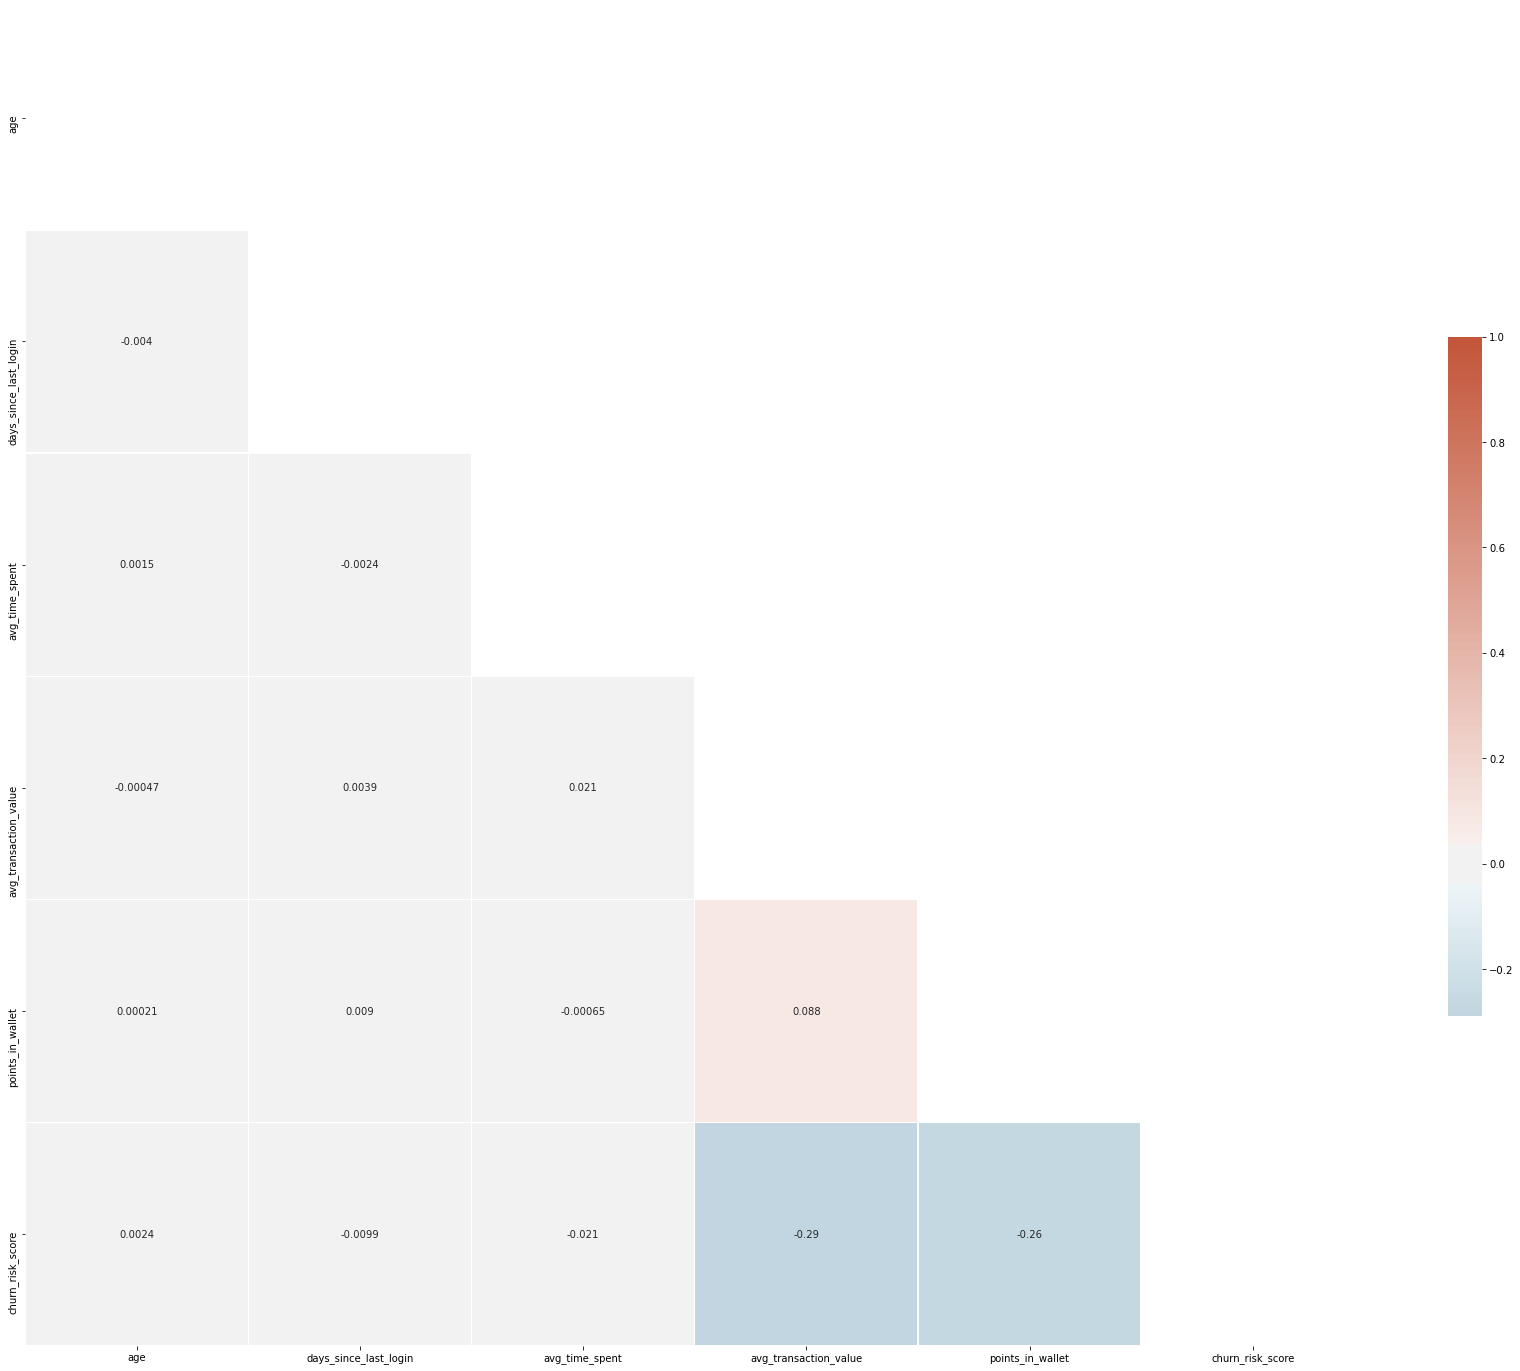

In [125]:
#Correlation matrix
f, ax=plt.subplots(figsize=(30, 25))
mat=train.corr('pearson')
mask=np.triu(np.ones_like(mat, dtype=bool))
cmap=sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, square=True,
           linewidth=.5, cbar_kws={"shrink":.5})
plt.show()

In [126]:
#storing target variable and dropping it from train data
y=train['churn_risk_score']
train.drop(['churn_risk_score'], axis=1, inplace=True)

In [127]:
#combining train and test data
combine=pd.concat([train, test], axis=0, sort=False)
train.shape, test.shape, combine.shape

((36992, 24), (19919, 24), (56911, 24))

In [128]:
for i in combine.columns:
    if combine[i].dtype==object:
        print(combine[i].value_counts())
        print(combine[i].unique())

fffe43004900440032003800300038003200    1
fffe43004900440032003100360031003400    1
fffe4300490044003100360031003300        1
fffe43004900440032003800340030003400    1
fffe43004900440035003000370038003900    1
                                       ..
fffe43004900440033003100330034003700    1
fffe43004900440032003800330031003700    1
fffe43004900440035003400370034003700    1
fffe4300490044003300330036003000        1
fffe43004900440033003500310033003800    1
Name: customer_id, Length: 56911, dtype: int64
['fffe4300490044003600300030003800' 'fffe43004900440032003100300035003700'
 'fffe4300490044003100390032003600' ...
 'fffe43004900440036003100310036003700'
 'fffe43004900440034003200330033003600'
 'fffe43004900440036003200340030003100']
Tandra Fragale       1
Lesli Kuhlmann       1
Kym Rakow            1
Dian Zerby           1
Lesli Youngquist     1
                    ..
Tona Youngquist      1
Jacklyn Cappiello    1
Phoebe Hemmings      1
Meghan Wind          1
Glenda Horney        1
Na

In [129]:
#drop columns having all uniques values
combine.drop(['customer_id', 'Name', 'security_no'], axis=1, inplace=True)
combine.shape

(56911, 21)

In [130]:
#getting object type columns
combine.dtypes==object

age                             False
gender                           True
region_category                  True
membership_category              True
joining_date                     True
joined_through_referral          True
referral_id                      True
preferred_offer_types            True
medium_of_operation              True
internet_option                  True
last_visit_time                  True
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days         True
points_in_wallet                False
used_special_discount            True
offer_application_preference     True
past_complaint                   True
complaint_status                 True
feedback                         True
dtype: bool

In [131]:
#Looking at NaN % within data

nan=pd.DataFrame(combine.isna().sum(), columns=['NaN_sum'])
nan['feat']=nan.index
nan['type']=combine.dtypes
nan['Perc%']=(nan['NaN_sum']/56911)*100
nan=nan[nan['NaN_sum']>0]
nan=nan.sort_values(by=['NaN_sum'])
nan['Usability']=np.where(nan['Perc%']>20, 'Discard', 'Keep')
nan

,NaN_sum,feat,type,Perc%,Usability
preferred_offer_types,447,preferred_offer_types,object,0.785437,Keep
points_in_wallet,5406,points_in_wallet,float64,9.499042,Keep
region_category,8376,region_category,object,14.717717,Keep


In [132]:
# #visualization of values in object type columns
# fig, ax=plt.subplots(4,4, figsize=(20,20))
# r=0
# c=0
# for i in combine.columns:
#     if combine[i].dtype==object:
#         print(i)
#         sns.countplot(x=i, data=combine, ax=ax[r,c])
#         c+=1
#         if c==4:
#             r+=1
#             c=0

# Filling missing values

In [133]:
#filling object columns
combine['preferred_offer_types']=combine['preferred_offer_types'].fillna(combine['preferred_offer_types'].mode()[0])
combine['region_category']=combine['region_category'].fillna(combine['region_category'].mode()[0])

In [134]:
#filling numeric column
from sklearn.impute import KNNImputer
impute=KNNImputer()
colsf=combine.select_dtypes(include=float).columns
combine[colsf]=impute.fit_transform(combine.select_dtypes(include=float))

In [135]:
#Looking at NaN % within data
nan=pd.DataFrame(combine.isna().sum(), columns=['NaN_sum'])
nan['feat']=nan.index
nan['type']=combine.dtypes
nan['Perc%']=(nan['NaN_sum']/56911)*100
nan=nan[nan['NaN_sum']>0]
nan=nan.sort_values(by=['NaN_sum'])
nan['Usability']=np.where(nan['Perc%']>20, 'Discard', 'Keep')
nan

,NaN_sum,feat,type,Perc%,Usability


No NaN values remaining

# Preprocessing of object type columns
* gender - gen<br>
*region_category - region<br>
*membership_category - mem<br>
*joining_date<br>
*joined_through_referral - refer<br>
*referral_id<br>
*preferred_offer_types - off<br>
*medium_of_operation - op<br>
*internet_option - inter<br>
*last_visit_time<br>
*avg_frequency_login_days<br>
*used_special_discount - discount<br>
*offer_application_preference - offer<br>
*past_complaint - complaint<br>
*complaint_status - status<br>
*feedback - feed<br>

In [136]:
dummy_combine=pd.DataFrame.copy(combine)
dummy_combine.shape

(56911, 21)

* preprocessing columns having limited categories

In [137]:
combine['gender'].value_counts()

F          28462
M          28354
Unknown       95
Name: gender, dtype: int64

In [138]:
dummy=pd.get_dummies(combine['gender'])
dummy.head(2)

,F,M,Unknown
0,1,0,0
1,1,0,0


In [139]:
dummy=pd.get_dummies(combine['gender'])
dummy.columns=['gen_f', 'gen_m', 'gen_un']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 24)

In [140]:
combine['region_category'].value_counts()

Town       30139
City       19529
Village     7243
Name: region_category, dtype: int64

In [141]:
dummy=pd.get_dummies(combine['region_category'])
dummy.head(2)

,City,Town,Village
0,0,0,1
1,1,0,0


In [142]:
dummy=pd.get_dummies(combine['region_category'])
dummy.columns=['region_city', 'region_town', 'region_village']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 27)

In [143]:
combine['membership_category'].value_counts()

No Membership          11815
Basic Membership       11808
Gold Membership        10545
Silver Membership       9187
Premium Membership      6820
Platinum Membership     6736
Name: membership_category, dtype: int64

In [144]:
dummy=pd.get_dummies(combine['membership_category'])
dummy.head(2)

,Basic Membership,Gold Membership,No Membership,Platinum Membership,Premium Membership,Silver Membership
0,0,0,0,1,0,0
1,0,0,0,0,1,0


In [145]:
dummy=pd.get_dummies(combine['membership_category'])
dummy.columns=['mem_basic', 'mem_gold', 'mem_no', 'mem_plat', 'mem_prem', 'mem_silver']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 33)

In [146]:
combine['preferred_offer_types'].value_counts()

Credit/Debit Card Offers    19323
Gift Vouchers/Coupons       18844
Without Offers              18744
Name: preferred_offer_types, dtype: int64

In [147]:
dummy=pd.get_dummies(combine['preferred_offer_types'])
dummy.head(2)

,Credit/Debit Card Offers,Gift Vouchers/Coupons,Without Offers
0,0,1,0
1,0,1,0


In [148]:
dummy=pd.get_dummies(combine['preferred_offer_types'])
dummy.columns=['off_card', 'off_coupon', 'off_none']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 36)

In [149]:
# temp=combine['medium_of_operation']
# cc=temp.replace('?',np.nan)
# cc.isna().sum()

In [150]:
combine['medium_of_operation'].value_counts()

Desktop       21376
Smartphone    21281
?              8357
Both           5897
Name: medium_of_operation, dtype: int64

In [151]:
combine['medium_of_operation']=combine['medium_of_operation'].replace('?', 'Both')
combine['medium_of_operation'].value_counts()

Desktop       21376
Smartphone    21281
Both          14254
Name: medium_of_operation, dtype: int64

In [152]:
dummy=pd.get_dummies(combine['medium_of_operation'])
dummy.head(2)

,Both,Desktop,Smartphone
0,1,0,0
1,0,1,0


In [153]:
dummy=pd.get_dummies(combine['medium_of_operation'])
dummy.columns=['op_both', 'op_desk', 'op_phone']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 39)

In [154]:
combine['internet_option'].value_counts()

Wi-Fi          19012
Fiber_Optic    18983
Mobile_Data    18916
Name: internet_option, dtype: int64

In [155]:
dummy=pd.get_dummies(combine['internet_option'])
dummy.head(2)

,Fiber_Optic,Mobile_Data,Wi-Fi
0,0,0,1
1,0,1,0


In [156]:
dummy=pd.get_dummies(combine['internet_option'])
dummy.columns=['inter_fiber', 'inter_data', 'inter_wifi']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 42)

In [157]:
combine['used_special_discount'].value_counts()

Yes    31304
No     25607
Name: used_special_discount, dtype: int64

In [158]:
dummy=pd.get_dummies(combine['used_special_discount'])
dummy.head(2)

,No,Yes
0,0,1
1,0,1


In [159]:
dummy=pd.get_dummies(combine['used_special_discount'])
dummy.columns=['discount_no', 'discount_yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 44)

In [160]:
combine['offer_application_preference'].value_counts()

Yes    31385
No     25526
Name: offer_application_preference, dtype: int64

In [161]:
dummy=pd.get_dummies(combine['offer_application_preference'])
dummy.head(2)

,No,Yes
0,0,1
1,1,0


In [162]:
dummy=pd.get_dummies(combine['offer_application_preference'])
dummy.columns=['offer_no', 'offer_yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 46)

In [163]:
combine['past_complaint'].value_counts()

No     28552
Yes    28359
Name: past_complaint, dtype: int64

In [164]:
dummy=pd.get_dummies(combine['past_complaint'])
dummy.head(2)

,No,Yes
0,1,0
1,0,1


In [165]:
dummy=pd.get_dummies(combine['past_complaint'])
dummy.columns=['complaint_no', 'complaint_yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 48)

In [166]:
combine['complaint_status'].value_counts()

Not Applicable              28552
Solved in Follow-up          7167
No Information Available     7100
Unsolved                     7096
Solved                       6996
Name: complaint_status, dtype: int64

In [167]:
dummy=pd.get_dummies(combine['complaint_status'])
dummy.head(2)

,No Information Available,Not Applicable,Solved,Solved in Follow-up,Unsolved
0,0,1,0,0,0
1,0,0,1,0,0


In [168]:
dummy=pd.get_dummies(combine['complaint_status'])
dummy.columns=['status_noinfo', 'status_not', 'status_solved', 'status_followup', 'status_unsolved']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 53)

In [169]:
combine['feedback'].value_counts()

Poor Product Quality        9724
No reason specified         9713
Too many ads                9680
Poor Customer Service       9662
Poor Website                9572
Reasonable Price            2205
Products always in Stock    2160
Quality Customer Care       2115
User Friendly Website       2080
Name: feedback, dtype: int64

In [170]:
dummy=pd.get_dummies(combine['feedback'])
dummy.head(2)

,No reason specified,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0


In [171]:
dummy=pd.get_dummies(combine['feedback'])
dummy.columns=['feed_noreason', 'feed_poorcs', 'feed_poorproduct', 'feed_poorweb', 'feed_stock', 'feed_qualitycc', 'feed_price', 'feed_ads', 'feed_friendly']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 62)

* preprocessing columns having many uniques values

In [181]:
dummy=pd.to_datetime(dummy_combine['joining_date'])

In [190]:
# dummy.dt.month
# dummy.dt.year
# dummy.dt.day

In [191]:
dummy_combine['joining_year']=dummy.dt.year
dummy_combine['joining_month']=dummy.dt.month
dummy_combine['joining_day']=dummy.dt.day

In [193]:
dummy_combine.drop(['joining_date'], axis=1, inplace=True)

In [194]:
dummy=pd.to_datetime(dummy_combine['last_visit_time'])

In [196]:
dummy

0       2021-04-15 16:08:02
1       2021-04-15 12:38:13
2       2021-04-15 22:53:21
3       2021-04-15 15:57:50
4       2021-04-15 15:46:44
                ...        
19914   2021-04-15 00:32:43
19915   2021-04-15 07:54:37
19916   2021-04-15 09:26:37
19917   2021-04-15 21:59:14
19918   2021-04-15 10:50:15
Name: last_visit_time, Length: 56911, dtype: datetime64[ns]

In [202]:
# dummy.dt.hour
# dummy.dt.minute
# dummy.dt.second

In [203]:
dummy_combine['last_visit_hour']=dummy.dt.hour
dummy_combine['last_visit_minute']=dummy.dt.minute
dummy_combine['last_visit_second']=dummy.dt.second

In [204]:
dummy_combine.drop(['last_visit_time'], axis=1, inplace=True)

In [205]:
dummy_combine['avg_frequency_login_days'].value_counts()

Error                  5437
17.0                   2108
13.0                   2090
14.0                   2084
19.0                   2080
                       ... 
33.33864096190216         1
-15.637524790689731       1
0.4342235722050063        1
32.190935875725216        1
3.434648272379544         1
Name: avg_frequency_login_days, Length: 2569, dtype: int64

As we can see that it has integer values except Error(an error might have occured because of which the days were not recorded)

In [206]:
dummy=dummy_combine['avg_frequency_login_days'].replace('Error', 0)
dummy.value_counts()

0                      5437
17.0                   2108
13.0                   2090
14.0                   2084
19.0                   2080
                       ... 
-15.637524790689731       1
0.4342235722050063        1
32.190935875725216        1
-11.749275160004839       1
44.6757789127119          1
Name: avg_frequency_login_days, Length: 2569, dtype: int64

In [207]:
dummy_combine['avg_frequency_login_days']=dummy

In [208]:
dummy_combine['avg_frequency_login_days']=dummy_combine['avg_frequency_login_days'].apply(lambda x: float(x))

In [209]:
dummy=dummy_combine['avg_frequency_login_days'].apply(lambda x: 0 if x<0 else x)
dummy.value_counts()

0.000000     6515
17.000000    2108
13.000000    2090
14.000000    2084
19.000000    2080
             ... 
50.305576       1
39.465790       1
42.948343       1
35.955487       1
44.169261       1
Name: avg_frequency_login_days, Length: 1491, dtype: int64

In [210]:
dummy_combine['avg_frequency_login_days']=dummy_combine['avg_frequency_login_days'].apply(lambda x: 0 if x<0 else x)

In [211]:
#storing referral related columns
dummy=dummy_combine[['joined_through_referral', 'referral_id']]

In [212]:
dummy

,joined_through_referral,referral_id
0,No,xxxxxxxx
1,?,CID21329
2,Yes,CID12313
3,Yes,CID3793
4,No,xxxxxxxx
...,...,...
19914,No,xxxxxxxx
19915,Yes,CID45490
19916,No,xxxxxxxx
19917,Yes,CID37167


In [213]:
dummy['joined_through_referral'].value_counts()

Yes    24332
No     24143
?       8436
Name: joined_through_referral, dtype: int64

In [214]:
dummy[(dummy['joined_through_referral']=='Yes')]['referral_id'].value_counts()

xxxxxxxx    2286
CID22424      11
CID43705      11
CID3979       10
CID49598      10
            ... 
CID27581       1
CID4454        1
CID29522       1
CID51719       1
CID30497       1
Name: referral_id, Length: 12334, dtype: int64

In [215]:
dummy[(dummy['joined_through_referral']=='No')]['referral_id'].value_counts()

xxxxxxxx    24143
Name: referral_id, dtype: int64

In [216]:
dummy[(dummy['joined_through_referral']=='?')]['referral_id'].value_counts()

xxxxxxxx    871
CID63748      6
CID16200      6
CID23523      5
CID58334      5
           ... 
CID19353      1
CID39594      1
CID63322      1
CID6396       1
CID39032      1
Name: referral_id, Length: 5964, dtype: int64

In [217]:
#Replacing '?' with 'No' where referral id not given as it means that person was not referred
dummy.loc[(dummy['referral_id']=='xxxxxxxx') & (dummy['joined_through_referral']=='?'), 'joined_through_referral']='No'

C:\Users\Akshat\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [218]:
dummy.loc[(dummy['referral_id']=='xxxxxxxx') & (dummy['joined_through_referral']=='?')]['joined_through_referral']

Series([], Name: joined_through_referral, dtype: object)

In [219]:
#Replacing '?' with 'Yes' where referral id is given as it means that person was referred
dummy.loc[(dummy['referral_id']!='xxxxxxxx') & (dummy['joined_through_referral']=='?'), 'joined_through_referral']='Yes'

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [220]:
dummy.loc[(dummy['referral_id']!='xxxxxxxx') & (dummy['joined_through_referral']=='?')]['joined_through_referral']

Series([], Name: joined_through_referral, dtype: object)

In [221]:
dummy['joined_through_referral'].value_counts()

Yes    31897
No     25014
Name: joined_through_referral, dtype: int64

In [222]:
dummy_combine['joined_through_referral']=dummy['joined_through_referral']

In [223]:
dummy=pd.get_dummies(dummy_combine['joined_through_referral'])
dummy.head(2)

,No,Yes
0,1,0
1,0,1


In [224]:
dummy=pd.get_dummies(dummy_combine['joined_through_referral'])
dummy.columns=['refer_no', 'refer_yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(56911, 68)

- dropping the object columns whose dummy variables have been created and also referral id as there's no way of knowing missing referral ids

In [225]:
dummy=dummy_combine.drop(['gender', 'region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation',
                           'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status',
                           'feedback', 'referral_id', 'joined_through_referral'], axis=1)

In [226]:
dummy.shape

(56911, 55)

In [227]:
dummy.dtypes==object

age                         False
days_since_last_login       False
avg_time_spent              False
avg_transaction_value       False
avg_frequency_login_days    False
points_in_wallet            False
gen_f                       False
gen_m                       False
gen_un                      False
region_city                 False
region_town                 False
region_village              False
mem_basic                   False
mem_gold                    False
mem_no                      False
mem_plat                    False
mem_prem                    False
mem_silver                  False
off_card                    False
off_coupon                  False
off_none                    False
op_both                     False
op_desk                     False
op_phone                    False
inter_fiber                 False
inter_data                  False
inter_wifi                  False
discount_no                 False
discount_yes                False
offer_no      

# Preprocessing numeric columns

# Getting train and test data

In [228]:
train.shape, test.shape

((36992, 24), (19919, 24))

In [229]:
x_train=dummy[:36992]
x_test=dummy[36992:]
x_train.shape, x_test.shape

((36992, 55), (19919, 55))

In [230]:
y.value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

As we can see there are also -1 in the dataset but in the data description it's given that it is in the range 1-5 <br>
So, 1 might have been mistyped as -1 

In [231]:
yabs=y.abs()
yabs.value_counts()

3    10424
4    10185
5     9827
1     3815
2     2741
Name: churn_risk_score, dtype: int64

In [232]:
new_train=pd.concat([train['customer_id'], x_train, yabs], axis=1)
new_test=pd.concat([test['customer_id'], x_test], axis=1)
new_train.shape, new_test.shape

((36992, 57), (19919, 56))

In [234]:
new_train.to_csv('dataset/new_train4.csv', index=False)
new_test.to_csv('dataset/new_test4.csv', index=False)